In [13]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from mst import Graph
import numpy as np
import heapq as hq
import networkx as nx
import random

In [15]:
G = Graph('data/small.csv') # Assign graph object.
G.adj_mat # Create numpy array of floats from adjacency matrix.

array([[0., 5., 0., 5.],
       [5., 0., 1., 2.],
       [0., 1., 0., 4.],
       [5., 2., 4., 0.]])

In [16]:
np.where(G.adj_mat == 0) # Find pairs of vertices that are not connected.

(array([0, 0, 1, 2, 2, 3]), array([0, 2, 1, 0, 2, 3]))

In [17]:
len(np.where(G.adj_mat == 0)[0]) # How many instances of no edges exist.

6

{(0, 1): Text(0.01068780401938177, -0.6056228098972345, '5.0'),
 (0, 3): Text(-0.3469127659951966, -0.2451949409023484, '5.0'),
 (1, 0): Text(0.01068780401938177, -0.6056228098972345, '5.0'),
 (1, 2): Text(0.34691276599519694, 0.24519494090234834, '1.0'),
 (1, 3): Text(0.06602738052623161, -0.14918224920041723, '2.0'),
 (2, 1): Text(0.34691276599519694, 0.24519494090234834, '1.0'),
 (2, 3): Text(-0.010687804019381436, 0.6056228098972345, '4.0'),
 (3, 0): Text(-0.3469127659951966, -0.2451949409023484, '5.0'),
 (3, 1): Text(0.06602738052623161, -0.14918224920041723, '2.0'),
 (3, 2): Text(-0.010687804019381436, 0.6056228098972345, '4.0')}

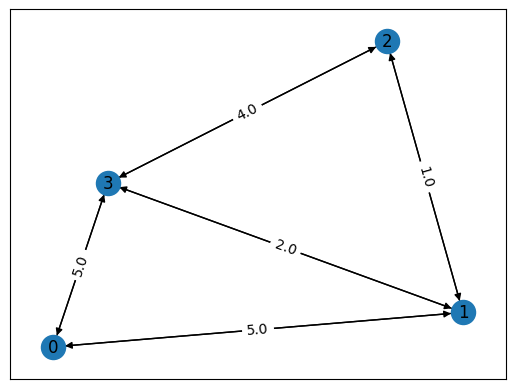

In [18]:
matrix = np.matrix(G.adj_mat) # Create numpy matrix from adjacency matrix.
G2 = nx.from_numpy_array(matrix, create_using=nx.DiGraph)
layout = nx.spring_layout(G2) # Creates force-directed representation of network for visualization.
nx.draw_networkx(G2, layout) # Draws network.

labels = nx.get_edge_attributes(G2, 'weight')
nx.draw_networkx_edge_labels(G2, pos = layout, edge_labels = labels) # Show edge weight labels on visualization.

In [19]:
vertices = np.shape(G.adj_mat)[0] # How many vertices are in the network.
vertices

4

In [20]:
G = G.adj_mat
# Printing edge weights for different edges.
print(G[0,1])
print(G[0,3])
print(G[0,2])
print(G[1,2])
print(G[0,1], 0, 1)

5.0
5.0
0.0
1.0
5.0 0 1


In [21]:
visited = [] # Initialize list of visited vertices.
start = random.choice(range(0, vertices)) # Select a random start vertex in network.
priority_queue = [] # Initialize priority queue.

for vertex in range(vertices): # Loop through all vertex indices.
    if G[start, vertex] != 0: # If edge exists.
        priority_queue.append((G[start, vertex], start, vertex)) # Append edge and edge weight to priority queue.
visited.append(start) # Append visited vertex.
hq.heapify(priority_queue) # Turn into heap queue.

print(visited)
print(priority_queue)

[2]
[(1.0, 2, 1), (4.0, 2, 3)]


In [22]:
hq.heappush(priority_queue, (G[0,1], 0, 1)) # Push edge and edge weight into heap queue maintaining heap invariant.
print(priority_queue)

[(1.0, 2, 1), (4.0, 2, 3), (5.0, 0, 1)]


In [23]:
MST = np.zeros(G.shape) # Initialize minimum-spanning tree array of same size as original.
MST

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [24]:
vertices = np.shape(G)[0]
start = random.choice(range(0, vertices))
priority_queue = []
MST = np.zeros(G.shape)
visited = []

for vertex in range(vertices):
    if G[start, vertex] != 0:
        priority_queue.append((G[start, vertex], start, vertex))

visited.append(start)

hq.heapify(priority_queue)

while len(visited) != vertices: # While length of visited vertices is less than total amount.
    edge_weight, start, end = hq.heappop(priority_queue) # Pop and return smallest edge and edge weight from heapqueue, maintaing heap invariant.
    if end not in visited: # If end vertex has not yet been visited.
        MST[start, end] = edge_weight # Add edge and edge weight to MST.
        MST[end, start] = edge_weight
        visited.append(end) # Add end vertex to visited.
        
        for vertex in range(vertices): # Add new destinations from end vertex into priority queue.
            if G[end, vertex] != 0:
                hq.heappush(priority_queue, (G[end, vertex], end, vertex))
                
MST

array([[0., 5., 0., 0.],
       [5., 0., 1., 2.],
       [0., 1., 0., 0.],
       [0., 2., 0., 0.]])

{(0, 1): Text(-0.23115768809074103, 0.33617527396365626, '5.0'),
 (1, 0): Text(-0.23115768809074103, 0.33617527396365626, '5.0'),
 (1, 2): Text(-0.203341974751604, -0.44290614509371384, '1.0'),
 (1, 3): Text(0.4232327832411567, 0.22091858094263006, '2.0'),
 (2, 1): Text(-0.203341974751604, -0.44290614509371384, '1.0'),
 (3, 1): Text(0.4232327832411567, 0.22091858094263006, '2.0')}

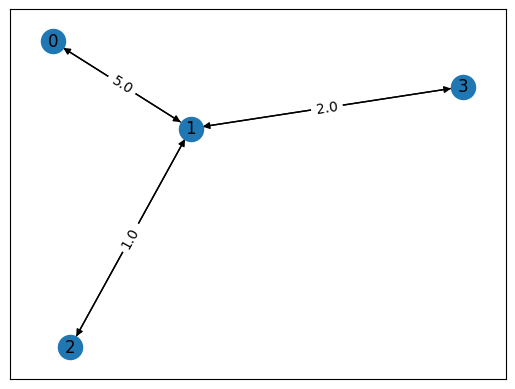

In [27]:
MST2 = nx.from_numpy_array(MST, create_using=nx.DiGraph)
layout2 = nx.spring_layout(MST2) # Creates force-directed representation of network for visualization.
nx.draw_networkx(MST2, layout2) # Draws network.

labels2 = nx.get_edge_attributes(MST2, 'weight')
nx.draw_networkx_edge_labels(MST2, pos = layout2, edge_labels = labels2) # Show edge weight labels on visualization.